# **CREACION DE UNA BASE DE DATOS ANALITICA**

### **EVIDENCIA DE APRENDISAJE 1, 2 y 3**

**INTEGRANTES:**

**OSCAR LUIS MARQUEZ ARRIETA**

**NATALIA JADITH CASTRO OSPINO**

**PREICA2502B020061**

## **PROBLEMATICA**

La empresa de fluido electrico EnergyCol especializada en el servicio de energia electrica a gran parte de las regiones de colombia, tanto residenciales como comerciales. Esta presentando problemas con el procesamineto de los datos de todos los clientes debido al alto tamaño de informacion que se tienen de todos los clientes.

Debido al a esta problematica, se implementara una base de datos bien estructurada y organiza, que permita implementar toda la informacion que se requiera de los usuarios. Esto le brindara a la empresa una mejor organizacion y las relaciones entre el tamaño del edificio, la ocupación, la ubicación geográfica y los costos de energía.

## **Dataset**

**Fuente:** Kaggle: Residential and Commercial Energy Cost Dataset

**Enlace:** https://www.kaggle.com/datasets/andreylss/residential-and-commercial-energy-cost-dataset

# **VARIABLES RELEVANTES**

**id_cliente:** Identificador único para cada cliente

**tipo_cliente:** Tipo de propiedad (residencial o comercial)

**costo_energía_brl:** Costo mensual de energía en moneda local

**tipo_cliente:** Tipo de propiedad (residencial o comercial)

**regiones:** Región geográfica (Norte, Noreste, Medio Oeste, Sudeste, Sur)

**Este Dataset lo escogimos porque se complementa muy bien con los datos que tenemos de todos los usuarios de nuestar empresa. Estos nos facilita hacer una muy buena migracion a esta base datos muy organizada y funcional para todo lo que se necesita respecto a los datos de nuestros usuarios.**










# **Modelo Entidad-Relación (ERD)**

![Diagrama Entidad-Relación](./ERD_ENERGYCOL.png)

Este diagrama representa un modelo de base de datos relacional para gestionar el consumo de energía de la empres EnergyCol.

**REGION**


Contiene información sobre las regiones geográficas.


Campos:


- id_region: Identificador único de la región (PK).

- nombre_region: Nombre de la región.

- tarifa_promedio_brl: Tarifa promedio de energía en reales brasileños (BRL).



**CLIENTE**


Almacena los datos de los clientes.


Campos:


- id_cliente: Identificador único del cliente (PK).

- nombre_cliente: Nombre del cliente.

- tipo_cliente: Tipo de cliente (residencial, comercial, industrial, etc.).

- direccion: Dirección del cliente.

- id_region: Llave foránea que conecta con la tabla REGION (FK).




**CONSUMO_ENERGIA**


Registra el consumo mensual de energía de cada cliente.


Campos:


- id_consumo: Identificador único del registro de consumo (PK).

- id_cliente: Llave foránea que conecta con CLIENTE (FK).

- mes y anio: Período de consumo.

- consumo_kwh: Energía consumida en kilovatios-hora.

- costo_energia_brl: Costo correspondiente al consumo en reales.



**Relaciones:**


Una región puede tener muchos clientes.

Un cliente puede tener muchos registros de consumo de energía.



# **Creacion BD + Carga de datos**

In [0]:
!pip install kagglehub[pandas-datasets]>=0.3.8

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


## **Librerias implementadas**

In [0]:

import kagglehub
import pandas as pd
import os
import zipfile

## **Descargamos, extraemos y leemos el dataset de Kaggle**

In [0]:

def download_dataset_zip(url = ""):
        print("Descargando dataset desde Kaggle...")
        dataset_path = kagglehub.dataset_download(url)
        print("Ruta al dataset:", dataset_path)
        return dataset_path
    
def extract_zip_files(dataset_path):
        zip_files = [f for f in os.listdir(dataset_path) if f.endswith('.zip')]
        if zip_files:
            zip_file = os.path.join(dataset_path, zip_files[0])
            extract_dir = os.path.join(dataset_path, "extracted")
            os.makedirs(extract_dir, exist_ok=True)
            print(f"Extrayendo {zip_file} en {extract_dir}...")
            with zipfile.ZipFile(zip_file, "r") as z:
                z.extractall(extract_dir)
            return extract_dir
        else:
            # Si no se encuentra un ZIP, se verifica si existen archivos CSV en la ruta
            csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
            if csv_files:
                print("No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.")
                return dataset_path
            else:
                raise FileNotFoundError("No se encontró ningún archivo .zip ni archivos .csv en la ruta del dataset")

def create_csv(csv_dir):
        #os.makedirs('src/static/csv', exist_ok=True)
        csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
        if not csv_files:
            raise FileNotFoundError("No se encontraron archivos CSV en el directorio extraído")

        for file in csv_files:
            file_path = os.path.join(csv_dir, file)
            print(f"Leyendo {file_path}...")
            try:
                df = pd.read_csv(file_path, encoding="latin1")
            except Exception as e:
                print(f"Error al leer {file}: {e}")
                continue
            print(f"Creando/actualizando ")
        print("cvs creado correctamente en ")
        return df

## **Descargamos Dataset**

In [0]:
df = pd.DataFrame()
dataset = download_dataset_zip("andreylss/residential-and-commercial-energy-cost-dataset") 
csv_dir =extract_zip_files(dataset)
df = create_csv(csv_dir)


Descargando dataset desde Kaggle...
Ruta al dataset: /home/spark-bab6d443-b538-436c-9290-07/.cache/kagglehub/datasets/andreylss/residential-and-commercial-energy-cost-dataset/versions/1
No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.
Leyendo /home/spark-bab6d443-b538-436c-9290-07/.cache/kagglehub/datasets/andreylss/residential-and-commercial-energy-cost-dataset/versions/1/energy_consumption.csv...
Creando/actualizando 
cvs creado correctamente en 


## **Verificamos la carga de los datos cargados de Kaggle**

In [0]:
df.head(3)

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54


## **Convertir Dataframe de pandas a Spark**

In [0]:

spark_df = spark.createDataFrame(df)

## **Creación la Tabla e Inserto de Datos**

In [0]:
spark_df.write.mode("overwrite").saveAsTable("tbl_clientes_al_dia")

## **Ver tabla creada**

In [0]:
%sql
SELECT
  *
FROM
  tbl_clientes_al_dia
LIMIT 5;

customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
CUSTOMER_4001,residential,South,17,3,102.57
CUSTOMER_4002,commercial,Midwest,17,3,88.09
CUSTOMER_4003,commercial,Midwest,45,4,126.13
CUSTOMER_4004,residential,Midwest,45,3,72.51
CUSTOMER_4005,residential,Midwest,45,1,77.59


## **Cosultas SQL**

## **1. Conteo de registros**

In [0]:
%sql
SELECT
  COUNT(*)
FROM
  tbl_clientes_al_dia

COUNT(*)
5000


El conteo nos arroja que la tabla tbl_**clientes_al_dia** cuenta con 5000 registros en total realizados.

## **2. Nombre y tipos de columnas**

In [0]:
%sql
DESCRIBE TABLE tbl_clientes_al_dia

col_name,data_type,comment
customer_id,string,null
customer_type,string,null
regions,string,null
building_size_m2,bigint,null
occupants,bigint,null
energy_cost_brl,double,null


Esta cosulta nos devuelve la estructura de la tabala **tbl_clientes_al_dia**, nos muestra el nombre de la columna y el tipo de dato de cada uno de los datos.

## **3. Cosulta con filtro**

In [0]:
%sql
SELECT
  *
FROM
  tbl_clientes_al_dia
WHERE
  regions = 'Northeast'
LIMIT (10);

customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
CUSTOMER_4006,residential,Northeast,77,2,73.91
CUSTOMER_4007,residential,Northeast,24,2,95.03
CUSTOMER_4011,residential,Northeast,52,4,150.69
CUSTOMER_4012,residential,Northeast,77,3,74.09
CUSTOMER_4015,residential,Northeast,24,1,79.69
CUSTOMER_4021,residential,Northeast,52,4,152.97
CUSTOMER_4024,commercial,Northeast,24,3,78.92
CUSTOMER_4026,commercial,Northeast,24,2,85.96
CUSTOMER_4031,commercial,Northeast,45,4,158.15
CUSTOMER_4033,residential,Northeast,52,3,58.45


Aqui hacemos una cosulta a la tabla **tbl_clientes_al_dia** en la que hacemos un filtro en donde le mandamos que nos muestre a los clientes que estan en la region Nor oeste. Esta nos arroja muy claramente los clientes que se encuentran en esa region, nos muestra las filas y columnas de esta tabla.

In [0]:
%sql
SELECT
  COUNT(*)
FROM
  tbl_clientes_al_dia
WHERE
  regions = 'Northeast'

COUNT(*)
1266


Aqui quise realizar un conteo de cuantos clientes hay en la region Noroeste, este nos muestra que en total hay 1266 clientes en esta region.

# **ACTIVIDAD 2 BIG DATA**

## **Punto 1**

**1.1  Describe las entidades y campos clave del dataset (tipos de datos, llaves, nulabilidad).**


**Region**
| Campo                   | Tipo de dato     | Llave | Nulabilidad | Descripción                                               |
| ----------------------- | ---------------- | ----- | ----------- | --------------------------------------------------------- |
| **id_region**           | INT              | PK    | NOT NULL    | Identificador único de la región.                         |
| **nombre_region**       | VARCHAR | —     | NULL        | Nombre descriptivo de la región.                          |
| **tarifa_promedio_brl** | DECIMAL(10,2)    | —     | NULL        | Tarifa promedio del suministro eléctrico en reales (BRL). |




**Cliente**
| Campo              | Tipo de dato     | Llave | Nulabilidad | Descripción                                                 |
| ------------------ | ---------------- | ----- | ----------- | ----------------------------------------------------------- |
| **id_cliente**     | INT              | PK    | NOT NULL    | Identificador único del cliente.                            |
| **nombre_cliente** | VARCHAR | —     | NULL        | Nombre completo del cliente.                                |
| **tipo_cliente**   | VARCHAR | —     | NULL        | Tipo de cliente (residencial, comercial, industrial, etc.). |
| **direccion**      | VARCHAR | —     | NULL        | Dirección física del cliente.                               |
| **id_region**      | INT              | FK    | NOT NULL    | Relación con la región del cliente.                         |



**Cosumo_Energia**
| Campo                 | Tipo de dato     | Llave | Nulabilidad | Descripción                                  |
| --------------------- | ---------------- | ----- | ----------- | -------------------------------------------- |
| **id_consumo**        | INT              | PK    | NOT NULL    | Identificador único del registro de consumo. |
| **id_cliente**        | INT              | FK    | NOT NULL    | Cliente asociado al consumo.                 |
| **mes**               | VARCHAR | —     | NULL        | Mes del consumo (ej. “enero”).               |
| **anio**              | INT              | —     | NULL        | Año del registro de consumo.                 |
| **consumo_kwh**       | DECIMAL(10,2)    | —     | NULL        | Cantidad de energía consumida en kWh.        |
| **costo_energia_brl** | DECIMAL(10,2)    | —     | NULL        | Costo total del consumo mensual.             |



**1.2 Propón un DDL (Spark SQL) o una StructType (PySpark) que represente el esquema.**

In [0]:
%sql
-- Usar catálogo y esquema
USE CATALOG Energia_iudigital;
USE SCHEMA energia_schema;

-- Tabla REGION
DROP TABLE IF EXISTS region;
CREATE TABLE region (
    id_region STRING,
    nombre_region STRING
) USING DELTA;


-- Tabla CLIENTE
DROP TABLE IF EXISTS cliente;
CREATE TABLE cliente (
    customer_id STRING,
    customer_type STRING,
    building_size_m2 INT,
    occupants INT,
    id_region STRING
) USING DELTA;


-- Tabla CONSUMO_ENERGIA
DROP TABLE IF EXISTS consumo_energia;
CREATE TABLE consumo_energia (
    customer_id STRING,
    energy_cost_brl DOUBLE
) USING DELTA;


    


**1.3 Incluye un diagrama simple (Mermaid/draw.io) o tabla de diccionario de datos en una celda Markdown.**


![](mermaid-diagram-2025-11-22-154423.png)

# Punto 2.
Configuración y evidencia de la infraestructura en Databricks CE


#####Databricks Community Edition crea el clúster con configuraciones predeterminadas que no pueden ser modificadas por nosotros los usuario. A continuación se presentan las capturas que evidencian la versión del entorno y los recursos asignados automáticamente.

En esta imagen se puede observar el clúster creado automaticamente por Databrick Community Edition. El sistema nos asigna por defecto la versión de Databricks Runtime y los demas recursos sin permitir edición manual.

![](/Workspace/Users/oscar.marquezla@est.iudigital.edu.co/Oscar_Marquez_Natalia_Castro_Actividad_1/Captura de pantalla 2025-11-22 224346.png)

En esta imagen se visualizan los recursos asignados al clúster ( Runtime, tipo de clúster, autoscaling... entre otros,.). En Databricks CE estos valores no pueden modificarse y se establecen de manera predeterminada.

- ![](/Workspace/Users/oscar.marquezla@est.iudigital.edu.co/Oscar_Marquez_Natalia_Castro_Actividad_1/Captura de pantalla 2025-11-22 224546.png)

![](/Workspace/Users/oscar.marquezla@est.iudigital.edu.co/Oscar_Marquez_Natalia_Castro_Actividad_1/Captura de pantalla 2025-11-22 224608.png)

Finalmente, se observa el clúster ejecutándose. Una vez iniciado, el entorno está listo para ejecutar celdas en Python y Spark dentro de Databricks CE.

![](/Workspace/Users/oscar.marquezla@est.iudigital.edu.co/Oscar_Marquez_Natalia_Castro_Actividad_1/Captura de pantalla 2025-11-22 224902.png)

#####2.1 Versión de Databricks Runtime, tipo de clúster, núcleos/RAM, autoscaling.




Nombre: Serverless Starter Warehouse (CE default)

Estado: Running

Tipo: Serverless

Cluster size: 2X-Small

Auto stop: 10 minutos de inactividad

Scaling: Min 1 – Max 1 (Autoscaling limitado por CE)

Channel / Runtime: Current (v 2025.30)

Cluster: No permite más de 1(limitación de Community Edition)



#####2.2 Versiones de Python/Spark: spark.version, spark.sparkContext.getConf().getAll().

####2.2.1 Versión

In [0]:
import sys
print("Python version:", sys.version)

Python version: 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]


####2.2.2 Spark Version

In [0]:
spark.version

'4.0.0'

####2.2.3 Configuración general del SparkContext

In [0]:
# imprimir keys seleccionadas de configs
configs = None
try:
    configs = spark.conf.getAll() if hasattr(spark.conf, "getAll") and callable(getattr(spark.conf, "getAll")) else getattr(spark.conf, "getAll")
except Exception:
    # fallback (si getAll no es callable, se usa directamente el dict que ya existe)
    configs = getattr(spark.conf, "getAll", spark.conf)

keys = [
    "spark.databricks.execution.timeout",
    "spark.sql.ansi.enabled",
    "spark.sql.shuffle.partitions",
    "spark.driver.memory",
    "spark.executor.memory",
    "spark.executor.cores",
    "spark.databricks.clusterUsageTags.clusterName"
]

print("Configuraciones seleccionadas (si existen):")
for k in keys:
    print(k, "=", configs.get(k, "<no disponible>"))


Configuraciones seleccionadas (si existen):
spark.databricks.execution.timeout = 9000
spark.sql.ansi.enabled = true
spark.sql.shuffle.partitions = auto
spark.driver.memory = <no disponible>
spark.executor.memory = <no disponible>
spark.executor.cores = <no disponible>
spark.databricks.clusterUsageTags.clusterName = <no disponible>


####2.2.4 Estructura del almacenamiento (DBFS)

In [0]:
import os
print("¿DBFS está disponible?:", os.path.exists("/dbfs/"))

¿DBFS está disponible?: True


Databrick community Edition no soporta Unity Catalog ni Volumes. Por ende, el entorno usa DBFS (Databricks File System) como sistema de almacenamiento. 

# **Punto 3.**

 **3.1 Opción B (Manual/URL): descarga local y carga el archivo a DBFS (UI: Upload a /FileStore o Volumes).**

In [0]:
%fs ls /Volumes/workspace/energy/energy/energy_consumption.csv


path,name,size,modificationTime
dbfs:/Volumes/workspace/energy/energy/energy_consumption.csv,energy_consumption.csv,229907,1763857445000


**3.2 Carga en Spark: lee el archivo (CSV/JSON/Parquet) con spark.read aplicando el esquema diseñado.**

In [0]:
%sql
CREATE OR REPLACE TEMPORARY VIEW temp_energy
USING CSV
OPTIONS (
  path '/Volumes/workspace/energy/energy/energy_consumption.csv',
  header 'true',
  inferSchema 'true'
);


-- Ver las primeras filas
SELECT * FROM temp_energy LIMIT 10;



customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
CUSTOMER_0001,residential,Northeast,24,2,64.51
CUSTOMER_0002,commercial,Midwest,24,1,55.26
CUSTOMER_0003,commercial,Southeast,24,1,74.54
CUSTOMER_0004,residential,Northeast,45,4,147.06
CUSTOMER_0005,residential,Southeast,45,4,143.06
CUSTOMER_0006,residential,North,52,2,96.7
CUSTOMER_0007,residential,Midwest,17,3,52.99
CUSTOMER_0008,commercial,Southeast,45,3,102.13
CUSTOMER_0009,residential,Northeast,45,2,70.03
CUSTOMER_0010,commercial,Midwest,45,4,158.14


In [0]:
%sql
-- REGIONES únicas
INSERT INTO region
SELECT DISTINCT regions AS nombre_region,
       regions AS id_region
FROM temp_energy;


-- CLIENTES
INSERT INTO cliente
SELECT customer_id,
       customer_type,
       building_size_m2,
       occupants,
       regions AS id_region
FROM temp_energy;


-- CONSUMO_ENERGIA
INSERT INTO consumo_energia
SELECT customer_id,
       energy_cost_brl
FROM temp_energy;




num_affected_rows,num_inserted_rows
5000,5000


In [0]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

# Definir el esquema basado en el CSV
schema = StructType([
    StructField("customer_id", StringType(), True),
    StructField("customer_type", StringType(), True),
    StructField("regions", StringType(), True),
    StructField("building_size_m2", IntegerType(), True),
    StructField("occupants", IntegerType(), True),
    StructField("energy_cost_brl", DoubleType(), True)
])

# Leer el CSV usando spark.read con el esquema definido
df = spark.read.csv(
    "/Volumes/workspace/energy/energy/energy_consumption.csv",  # ruta del archivo CSV
    header=True,
    schema=schema
)

# Mostrar las primeras filas
df.show(5)

+-------------+-------------+---------+----------------+---------+---------------+
|  customer_id|customer_type|  regions|building_size_m2|occupants|energy_cost_brl|
+-------------+-------------+---------+----------------+---------+---------------+
|CUSTOMER_0001|  residential|Northeast|              24|        2|          64.51|
|CUSTOMER_0002|   commercial|  Midwest|              24|        1|          55.26|
|CUSTOMER_0003|   commercial|Southeast|              24|        1|          74.54|
|CUSTOMER_0004|  residential|Northeast|              45|        4|         147.06|
|CUSTOMER_0005|  residential|Southeast|              45|        4|         143.06|
+-------------+-------------+---------+----------------+---------+---------------+
only showing top 5 rows


**3.3 Persistencia: crea una tabla (saveAsTable o CREATE TABLE USING) y muestra %sql DESCRIBE TABLE.**

In [0]:
%sql
-- crear tabla using
CREATE TABLE IF NOT EXISTS energia_consumo
USING DELTA
AS 
SELECT *
FROM csv.`/Volumes/workspace/energy/energy/energy_consumption.csv`
    


num_affected_rows,num_inserted_rows


In [0]:
%sql
DESCRIBE TABLE energia_consumo;

col_name,data_type,comment
_c0,string,null
_c1,string,null
_c2,string,null
_c3,string,null
_c4,string,null
_c5,string,null


# **Punto 4**

**4.1 Metadatos: %sql DESCRIBE TABLE, SHOW CREATE TABLE; en Spark: df.printSchema().**

In [0]:
%sql
-- Ver columnas, tipos y nulabilidad
DESCRIBE TABLE region;

col_name,data_type,comment
id_region,string,null
nombre_region,string,null


In [0]:
%sql
-- Ver columnas, tipos y nulabilidad
DESCRIBE TABLE cliente;

col_name,data_type,comment
customer_id,string,null
customer_type,string,null
building_size_m2,int,null
occupants,int,null
id_region,string,null


In [0]:
%sql
-- Ver columnas, tipos y nulabilidad
DESCRIBE TABLE consumo_energia;

col_name,data_type,comment
customer_id,string,null
energy_cost_brl,double,null


In [0]:
%sql
-- Mostrar cómo se creó la tabla
SHOW CREATE TABLE region;

createtab_stmt
"CREATE TABLE energia_iudigital.energia_schema.region ( id_region STRING, nombre_region STRING) USING delta COLLATION 'UTF8_BINARY' TBLPROPERTIES ( 'delta.enableDeletionVectors' = 'true', 'delta.enableRowTracking' = 'true', 'delta.feature.appendOnly' = 'supported', 'delta.feature.deletionVectors' = 'supported', 'delta.feature.domainMetadata' = 'supported', 'delta.feature.invariants' = 'supported', 'delta.feature.rowTracking' = 'supported', 'delta.minReaderVersion' = '3', 'delta.minWriterVersion' = '7', 'delta.writePartitionColumnsToParquet' = 'true')"


In [0]:
%sql
SHOW CREATE TABLE cliente;

createtab_stmt
"CREATE TABLE energia_iudigital.energia_schema.cliente ( customer_id STRING, customer_type STRING, building_size_m2 INT, occupants INT, id_region STRING) USING delta COLLATION 'UTF8_BINARY' TBLPROPERTIES ( 'delta.enableDeletionVectors' = 'true', 'delta.enableRowTracking' = 'true', 'delta.feature.appendOnly' = 'supported', 'delta.feature.deletionVectors' = 'supported', 'delta.feature.domainMetadata' = 'supported', 'delta.feature.invariants' = 'supported', 'delta.feature.rowTracking' = 'supported', 'delta.minReaderVersion' = '3', 'delta.minWriterVersion' = '7', 'delta.writePartitionColumnsToParquet' = 'true')"


In [0]:
%sql
SHOW CREATE TABLE consumo_energia;

createtab_stmt
"CREATE TABLE energia_iudigital.energia_schema.consumo_energia ( customer_id STRING, energy_cost_brl DOUBLE) USING delta COLLATION 'UTF8_BINARY' TBLPROPERTIES ( 'delta.enableDeletionVectors' = 'true', 'delta.enableRowTracking' = 'true', 'delta.feature.appendOnly' = 'supported', 'delta.feature.deletionVectors' = 'supported', 'delta.feature.domainMetadata' = 'supported', 'delta.feature.invariants' = 'supported', 'delta.feature.rowTracking' = 'supported', 'delta.minReaderVersion' = '3', 'delta.minWriterVersion' = '7', 'delta.writePartitionColumnsToParquet' = 'true')"


In [0]:
# Cargar las tablas
df_region = spark.table("region")
df_cliente = spark.table("cliente")
df_consumo = spark.table("consumo_energia")

In [0]:

# Revisar esquema
df_region.printSchema()
df_cliente.printSchema()
df_consumo.printSchema()

root
 |-- id_region: string (nullable = true)
 |-- nombre_region: string (nullable = true)

root
 |-- customer_id: string (nullable = true)
 |-- customer_type: string (nullable = true)
 |-- building_size_m2: integer (nullable = true)
 |-- occupants: integer (nullable = true)
 |-- id_region: string (nullable = true)

root
 |-- customer_id: string (nullable = true)
 |-- energy_cost_brl: double (nullable = true)



### Propósito:
### Validar que las tablas tienen las columnas correctas, tipos de datos esperados y nulabilidad coherente con el modelo.

**4.2 Descripción de datos: df.describe().show() y/o %sql con funciones agregadas.**

In [0]:

#PySpark
# Descripción de columnas numéricas
df_cliente.describe(["building_size_m2", "occupants"]).show()
df_consumo.describe(["energy_cost_brl"]).show()


+-------+------------------+------------------+
|summary|  building_size_m2|         occupants|
+-------+------------------+------------------+
|  count|              5000|              5000|
|   mean|           39.5762|            2.3018|
| stddev|17.516379713618157|1.0327294253642647|
|    min|                17|                 1|
|    max|                77|                 4|
+-------+------------------+------------------+

+-------+------------------+
|summary|   energy_cost_brl|
+-------+------------------+
|  count|              5000|
|   mean| 86.87402800000002|
| stddev|24.383260557486963|
|    min|             52.52|
|    max|            158.61|
+-------+------------------+



In [0]:
%sql
-- Estadísticas básicas
SELECT 
    MIN(building_size_m2) AS min_size,
    MAX(building_size_m2) AS max_size,
    AVG(building_size_m2) AS avg_size,
    COUNT(*) AS total_clientes
FROM cliente;

min_size,max_size,avg_size,total_clientes
17,77,39.5762,5000


In [0]:
%sql
SELECT 
    MIN(energy_cost_brl) AS min_cost,
    MAX(energy_cost_brl) AS max_cost,
    AVG(energy_cost_brl) AS avg_cost,
    COUNT(*) AS total_consumos
FROM consumo_energia;

min_cost,max_cost,avg_cost,total_consumos
52.52,158.61,86.87402800000001,5000


### Propósito:
### Confirmar que Spark interpreta correctamente los tipos de datos y que coinciden con el esquema SQL.

**4.3 Consultas SELECT y GROUP BY: equivalentes en Spark y SQL comparando resultados.**

In [0]:
%sql
-- Conteo por tipo de cliente
SELECT customer_type, COUNT(*) AS total
FROM cliente
GROUP BY customer_type;

customer_type,total
residential,3261
commercial,1739


In [0]:
%sql
-- Consumo promedio por región
SELECT id_region, AVG(energy_cost_brl) AS promedio_cost
FROM consumo_energia c
JOIN cliente cl ON c.customer_id = cl.customer_id
GROUP BY id_region;

id_region,promedio_cost
Midwest,86.30726640159034
Northeast,86.92740126382299
Southeast,88.09754677754694
North,87.59463768115943
South,86.7439419087137


### **PySpark**

In [0]:
# Conteo por tipo de cliente
df_cliente.groupBy("customer_type").count().show()

+-------------+-----+
|customer_type|count|
+-------------+-----+
|  residential| 3261|
|   commercial| 1739|
+-------------+-----+



In [0]:
# Consumo promedio por región
df_consumo.join(df_cliente, "customer_id") \
          .groupBy("id_region") \
          .avg("energy_cost_brl") \
          .show()

+---------+--------------------+
|id_region|avg(energy_cost_brl)|
+---------+--------------------+
|  Midwest|   86.30726640159034|
|Northeast|   86.92740126382299|
|Southeast|   88.09754677754694|
|    North|   87.59463768115943|
|    South|    86.7439419087137|
+---------+--------------------+



### Propósito:
### Comparar resultados SQL y PySpark para validar consistencia entre ambos entornos. Detectar posibles errores de join o agregación.

**4.4 Conteos y muestras: COUNT(*), LIMIT, filtros por campo.**

In [0]:
%sql
-- Total de registros de clientes

SELECT COUNT(*) AS total_clientes FROM cliente;

total_clientes
5000


In [0]:
%sql
SELECT COUNT(*) AS total_consumos FROM consumo_energia;

total_consumos
5000


In [0]:
%sql
-- Muestra de datos
SELECT * FROM cliente LIMIT 10;

customer_id,customer_type,building_size_m2,occupants,id_region
CUSTOMER_0001,residential,24,2,Northeast
CUSTOMER_0002,commercial,24,1,Midwest
CUSTOMER_0003,commercial,24,1,Southeast
CUSTOMER_0004,residential,45,4,Northeast
CUSTOMER_0005,residential,45,4,Southeast
CUSTOMER_0006,residential,52,2,North
CUSTOMER_0007,residential,17,3,Midwest
CUSTOMER_0008,commercial,45,3,Southeast
CUSTOMER_0009,residential,45,2,Northeast
CUSTOMER_0010,commercial,45,4,Midwest


In [0]:
%sql
SELECT * FROM consumo_energia LIMIT 10;

customer_id,energy_cost_brl
CUSTOMER_0001,64.51
CUSTOMER_0002,55.26
CUSTOMER_0003,74.54
CUSTOMER_0004,147.06
CUSTOMER_0005,143.06
CUSTOMER_0006,96.7
CUSTOMER_0007,52.99
CUSTOMER_0008,102.13
CUSTOMER_0009,70.03
CUSTOMER_0010,158.14


In [0]:
%sql
-- Filtrar por región
SELECT * FROM cliente WHERE id_region = 'Northeast' LIMIT 5;

customer_id,customer_type,building_size_m2,occupants,id_region
CUSTOMER_0001,residential,24,2,Northeast
CUSTOMER_0004,residential,45,4,Northeast
CUSTOMER_0009,residential,45,2,Northeast
CUSTOMER_0011,residential,52,3,Northeast
CUSTOMER_0015,residential,45,1,Northeast


In [0]:
# Conteo de registros
print("Total clientes:", df_cliente.count())

Total clientes: 5000


In [0]:
print("Total consumos:", df_consumo.count())

Total consumos: 5000


In [0]:
# Muestra de datos
df_cliente.show(10)

+-------------+-------------+----------------+---------+---------+
|  customer_id|customer_type|building_size_m2|occupants|id_region|
+-------------+-------------+----------------+---------+---------+
|CUSTOMER_0001|  residential|              24|        2|Northeast|
|CUSTOMER_0002|   commercial|              24|        1|  Midwest|
|CUSTOMER_0003|   commercial|              24|        1|Southeast|
|CUSTOMER_0004|  residential|              45|        4|Northeast|
|CUSTOMER_0005|  residential|              45|        4|Southeast|
|CUSTOMER_0006|  residential|              52|        2|    North|
|CUSTOMER_0007|  residential|              17|        3|  Midwest|
|CUSTOMER_0008|   commercial|              45|        3|Southeast|
|CUSTOMER_0009|  residential|              45|        2|Northeast|
|CUSTOMER_0010|   commercial|              45|        4|  Midwest|
+-------------+-------------+----------------+---------+---------+
only showing top 10 rows


In [0]:
df_consumo.show(10)

+-------------+---------------+
|  customer_id|energy_cost_brl|
+-------------+---------------+
|CUSTOMER_0001|          64.51|
|CUSTOMER_0002|          55.26|
|CUSTOMER_0003|          74.54|
|CUSTOMER_0004|         147.06|
|CUSTOMER_0005|         143.06|
|CUSTOMER_0006|           96.7|
|CUSTOMER_0007|          52.99|
|CUSTOMER_0008|         102.13|
|CUSTOMER_0009|          70.03|
|CUSTOMER_0010|         158.14|
+-------------+---------------+
only showing top 10 rows


In [0]:
# Filtrado por región
df_cliente.filter(df_cliente.id_region == "Northeast").show(5)

+-------------+-------------+----------------+---------+---------+
|  customer_id|customer_type|building_size_m2|occupants|id_region|
+-------------+-------------+----------------+---------+---------+
|CUSTOMER_0001|  residential|              24|        2|Northeast|
|CUSTOMER_0004|  residential|              45|        4|Northeast|
|CUSTOMER_0009|  residential|              45|        2|Northeast|
|CUSTOMER_0011|  residential|              52|        3|Northeast|
|CUSTOMER_0015|  residential|              45|        1|Northeast|
+-------------+-------------+----------------+---------+---------+
only showing top 5 rows


### Propósito:
### Validar que los datos fueron cargados correctamente, que los filtros funcionan y que podemos acceder a muestras representativas.

#Punto 5.
####Ventajas y desventajas: SQL vs Spark


##5.1 SQL

###Ventajas

1. ***Facilidad de uso**:* Su sintaxis es declarativa y rápida de aprender.

2.  ***Alta expresividad para consultas:*** Contiene filtros, agrupaciones y joins.

3. ***Integración con herramientas BI:*** Contiene integraciones con herramientas como Power BI, Tableau, Looker. 

4. ***Rendiemito optimizado:*** Su rendimiento en motores tradicionales es optimizado.

###Desventajas

1. ***Limitaciones:***  tiene limitaciones para pipelines complejos de transformación. 

2. ***Manejo de datos:*** tiene un manejo limitado de datos no estructurados. 

3. ***Escalabilidad:*** Su escalabilidad es totalmente restringida a una sola maquina o motor. 

4. ***UDFs:*** Estas son costosas y poco flexibles. 


## 5.2 Spark(PySpark)

###Ventajas

1. ***Escalabilidad:*** Cuenta con una escalabilidad bastante alta. Usa Cluster computing.

2. ***APIs:*** cuenta con apis como DataFrames, SQL, RDDs.

3. ***Capacidad:*** Es capas de procesar grandes volúmenes de datos distribuidos.

4. ***Soporte:*** Cuenta con soporte para UDFs, MLlib, streaming, gráficos. 

###Desventajas

1. ***Curva de aprendizaje:*** Cuenta con una curva de aprendizaje mayor, sobre todo cuando se trata de optimización. 

2. ***Configuración:*** Requiere configuración para sus clústers, lo que lo hace menos trivial que un motor SQL.

3. ***Costos computacionales:*** sus costos son mayores en entornos no gratuitos.

4. ***Depuración*** sus depuraciones son mucho más complejas que un SQL tradicional. 

![](SQL Vs Spark.png)

# **Actividad 3 big data**

## **Punto 1**

In [0]:
from pyspark.sql import functions as F, Window

base = F.to_date(F.lit("2024-01-01"))
df_cliente = df_cliente.withColumn(
    "rn",
    F.row_number().over(Window.orderBy(F.monotonically_increasing_id()))
)
df_cliente = df_cliente.withColumn(
    "fecha",
    F.date_add(base, F.col("rn") - 1)
).drop("rn")

df_cliente = (
    df_cliente
    .withColumn("anio", F.year("fecha"))
    .withColumn("mes", F.month("fecha"))
    .withColumn("dia", F.dayofmonth("fecha"))
    .withColumn("dia_semana", F.dayofweek("fecha"))
    .withColumn("nombre_dia", F.date_format("fecha", "EEEE"))
)

display(df_cliente)


# Las columnas derivadas permiten analizar patrones temporales, como estacionalidad (anio, mes), tendencias diarias (dia, dia_semana) y comportamientos específicos por día de la semana (nombre_dia).

customer_id,customer_type,building_size_m2,occupants,id_region,fecha,anio,mes,dia,dia_semana,nombre_dia
CUSTOMER_0001,residential,24,2,Northeast,2024-01-01,2024,1,1,2,Monday
CUSTOMER_0002,commercial,24,1,Midwest,2024-01-02,2024,1,2,3,Tuesday
CUSTOMER_0003,commercial,24,1,Southeast,2024-01-03,2024,1,3,4,Wednesday
CUSTOMER_0004,residential,45,4,Northeast,2024-01-04,2024,1,4,5,Thursday
CUSTOMER_0005,residential,45,4,Southeast,2024-01-05,2024,1,5,6,Friday
CUSTOMER_0006,residential,52,2,North,2024-01-06,2024,1,6,7,Saturday
CUSTOMER_0007,residential,17,3,Midwest,2024-01-07,2024,1,7,1,Sunday
CUSTOMER_0008,commercial,45,3,Southeast,2024-01-08,2024,1,8,2,Monday
CUSTOMER_0009,residential,45,2,Northeast,2024-01-09,2024,1,9,3,Tuesday
CUSTOMER_0010,commercial,45,4,Midwest,2024-01-10,2024,1,10,4,Wednesday


Año (anio):
Esta columna nos permite analizar tendencias anuales y agrupar la información en periodos más largos. Aunque solo estamos usando 2024, es útil para identificar el crecimiento del consumo o las variaciones en los costos energéticos de un año a otro.

Mes (mes):
Facilita la identificación de patrones mensuales y la comparación entre meses, lo cual es fundamental para entender la estacionalidad o los aumentos en periodos específicos.

Día (dia):
Ofrece un nivel de detalle diario que nos ayuda a detectar anomalías, picos o días con comportamientos inusuales dentro de un mes.

Día de la semana (dia_semana):
Permite observar comportamientos que dependen del ciclo semanal, como las diferencias entre días laborales y fines de semana.

Nombre del día (nombre_dia):
Hace que la lectura y el análisis sean más intuitivos, facilitando la interpretación de patrones diarios.

## **Punto 2**

In [0]:
from pyspark.sql import functions as F

resumen_mensual = (
    df_cliente.groupBy("anio", "mes")
    .agg(
        F.count("*").alias("n_registros"),
        F.countDistinct("customer_id").alias("n_unicos")
    )
)
resumen_mensual.write.mode("overwrite").saveAsTable("resumen_mensual")

In [0]:
%sql
SELECT * FROM resumen_mensual LIMIT 10;

anio,mes,n_registros,n_unicos
2024,1,31,31
2024,2,29,29
2024,3,31,31
2024,4,30,30
2024,5,31,31
2024,6,30,30
2024,7,31,31
2024,8,31,31
2024,9,30,30
2024,10,31,31


La tabla de resumen mensual nos permite condensar la información en periodos más manejables y realizar comparaciones entre meses. Con métricas como el conteo de registros y datos únicos, podemos identificar meses con mayor actividad o variaciones en el comportamiento del conjunto de datos.

## **Punto 3**

In [0]:
from pyspark.sql import functions as F, types as T

df_before = df

# 1️⃣ Text normalization for "regions"
if "regions" in df.schema.names:
    df = df.withColumn(
        "regions_limpia",
        F.lower(
            F.trim(
                F.col("regions")
            )
        )
    )

# 2️⃣ Validation and type casting for "energy_cost_brl"
if "energy_cost_brl" in df.schema.names:
    df = df.withColumn(
        "energy_cost_brl",
        F.when(
            (F.col("energy_cost_brl").isNull()) | 
            (F.col("energy_cost_brl") < 0),
            None
        ).otherwise(
            F.col("energy_cost_brl")
        ).cast(T.DoubleType())
    )

    # 3️⃣ Impute nulls with mean
    media = df.select(
        F.mean(F.col("energy_cost_brl"))
    ).first()[0]
    df = df.na.fill(
        {"energy_cost_brl": media}
    )

    # 4️⃣ Remove outliers using IQR
    q25, q75 = df.approxQuantile(
        "energy_cost_brl",
        [0.25, 0.75],
        0.01
    )
    iqr = q75 - q25
    low, high = q25 - 1.5 * iqr, q75 + 1.5 * iqr

    df_limpio = df.filter(
        (F.col("energy_cost_brl") >= low) &
        (F.col("energy_cost_brl") <= high)
    )
else:
    df_limpio = df

display(
    df_before.select(
        "regions",
        "energy_cost_brl"
    ).limit(10)
)
display(
    df_limpio.select(
        "regions_limpia",
        "energy_cost_brl"
    ).limit(10)
)

regions,energy_cost_brl
Northeast,64.51
Midwest,55.26
Southeast,74.54
Northeast,147.06
Southeast,143.06
North,96.7
Midwest,52.99
Southeast,102.13
Northeast,70.03
Midwest,158.14


regions_limpia,energy_cost_brl
northeast,64.51
midwest,55.26
southeast,74.54
north,96.7
midwest,52.99
southeast,102.13
northeast,70.03
northeast,65.47
midwest,76.71
midwest,70.67


In [0]:
Normalización de texto en regiones

La limpieza de texto ayuda a estandarizar los nombres de las regiones, ya sea ajustando mayúsculas y minúsculas o eliminando espacios extra. Esto previene duplicados y hace que el análisis y agrupamiento por región sea mucho más sencillo.

Validación y conversión de tipo para energy_cost_brl

Se sustituyen los valores nulos o negativos, ya que no son válidos para un costo de energía. Al convertir la columna a un tipo numérico, aseguramos que se pueda utilizar en cálculos estadísticos sin errores.

Imputación de valores nulos usando la media

La imputación es clave para no perder registros importantes y mantener la coherencia de el conjunto de datos. Usar la media es una buena opción cuando la variable es continua y no presenta un sesgo fuerte.

Eliminación de outliers con IQR

Los valores atípicos pueden distorsionar los análisis estadísticos y afectar los modelos predictivos. El método IQR es una forma efectiva de filtrar datos extremos sin eliminar demasiados registros válidos.

## **Punto 4**

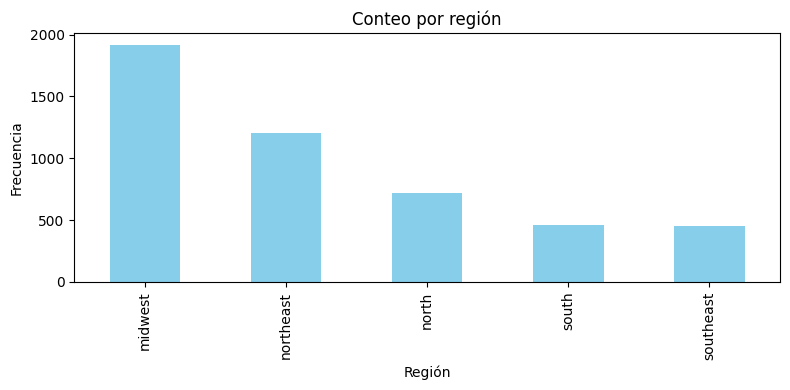

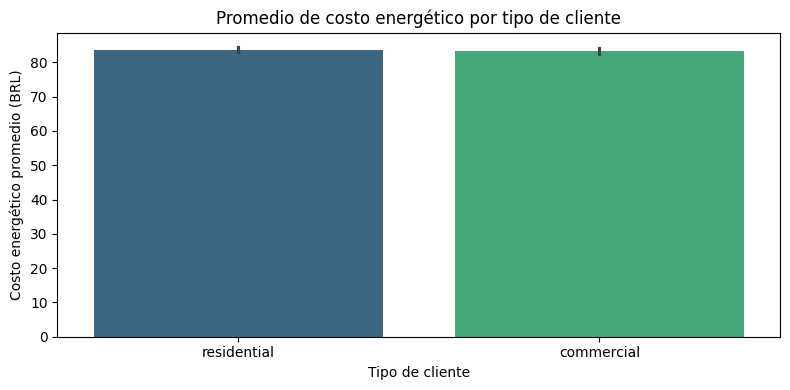

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to pandas
pdf = df_limpio.select(
    "regions_limpia",
    "energy_cost_brl",
    "customer_type"
).toPandas()

# 1️⃣ Bar plot: count per region
conteo = pdf["regions_limpia"].value_counts()
plt.figure(figsize=(8, 4))
conteo.plot(kind="bar", color="skyblue")
plt.title("Conteo por región")
plt.xlabel("Región")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 2️⃣ Seaborn: average energy cost by customer type
plt.figure(figsize=(8, 4))
sns.barplot(
    data=pdf,
    x="customer_type",
    y="energy_cost_brl",
    estimator="mean",
    palette="viridis"
)
plt.title("Promedio de costo energético por tipo de cliente")
plt.xlabel("Tipo de cliente")
plt.ylabel("Costo energético promedio (BRL)")
plt.tight_layout()
plt.show()


Visualización 1. Conteo por región

Este gráfico ilustra la cantidad de registros en cada región, lo que nos permite ver claramente cuáles áreas tienen una mayor representación en el conjunto de datos. Por ejemplo, el Midwest destaca con la mayor frecuencia. Esta información es valiosa para dirigir futuros análisis hacia las zonas con más clientes o actividad.

Visualización 2. Promedio de costo energético por tipo de cliente

En esta gráfica, se comparan los costos energéticos promedio entre clientes residenciales y comerciales. Aunque los valores son bastante parecidos, la visualización nos ayuda a detectar posibles diferencias en el consumo o en las tarifas según el tipo de cliente.

# **Link Video**

## https://drive.google.com/file/d/1wbIoVuGID2jGCDpa2AOtoL9iCiGO6Myn/view?usp=drivesdk